# 1. IMPORTATION ET ANALYSE EXPLORATOIRE DES DONNEES

In [1]:
# Lecture du dataset depuis un fichier CSV
import pandas as pd

data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
# Apercu des caracteristiques et types de donnees du dataset
data.info()

# 1469 echantillons et 34 caracteristiques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
# Apercu des colonnes du dataset
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# Identification des colonnes de type entier
int_col=[]
for col in data.columns:
    if data[col].dtype=='int64':
        int_col.append(col)
int_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

Text(0.5, 1.0, 'Distribution du dataset')

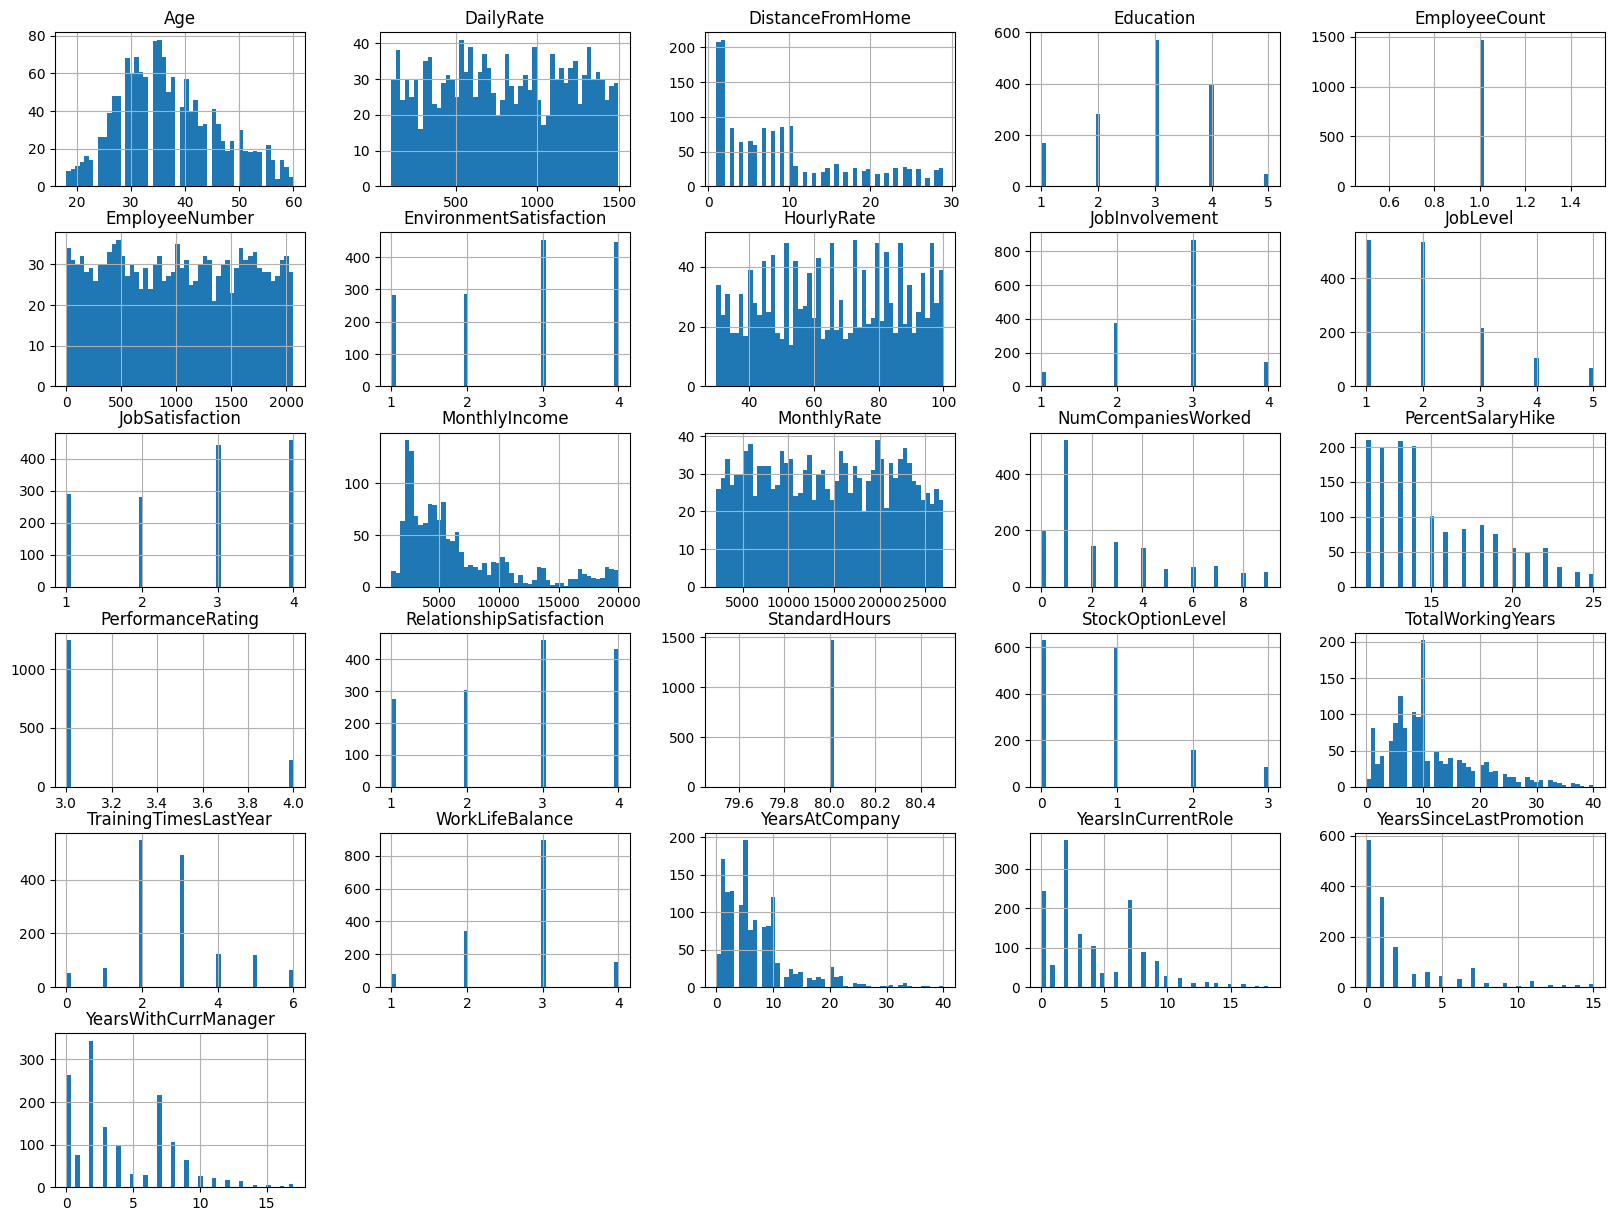

In [5]:
# Afficher la distribution de nos donnees
import matplotlib.pyplot as plt

data[int_col].hist(bins=50, figsize=(20,15))
plt.title("Distribution du dataset")


In [6]:
# Identification des colonnes categorielles
categorial_columns = data.select_dtypes(include=['object']).columns
categorial_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [7]:
# Apercu des donnees statistiques du dataset
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


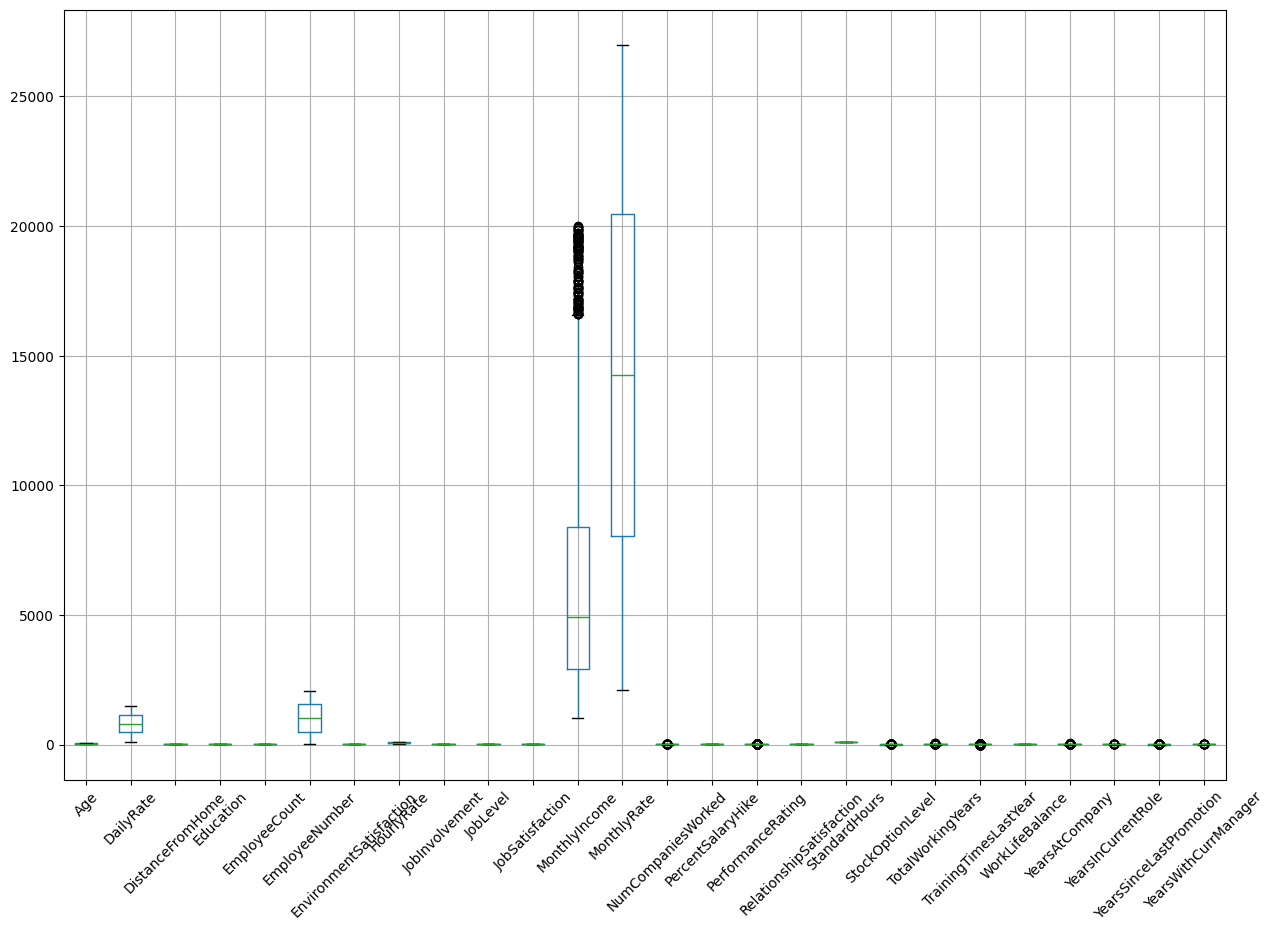

In [8]:
# Boxplot pour visualiser les outliers

plt.figure(figsize=(15, 10))  # Taille de la figure 
data.boxplot(int_col)

plt.xticks(rotation=45)  # Rotation des labels des axes pour qu'ils ne se chevauchent pas

plt.show()

# Pas de valeurs aberrantes significative dans le dataset

<Axes: >

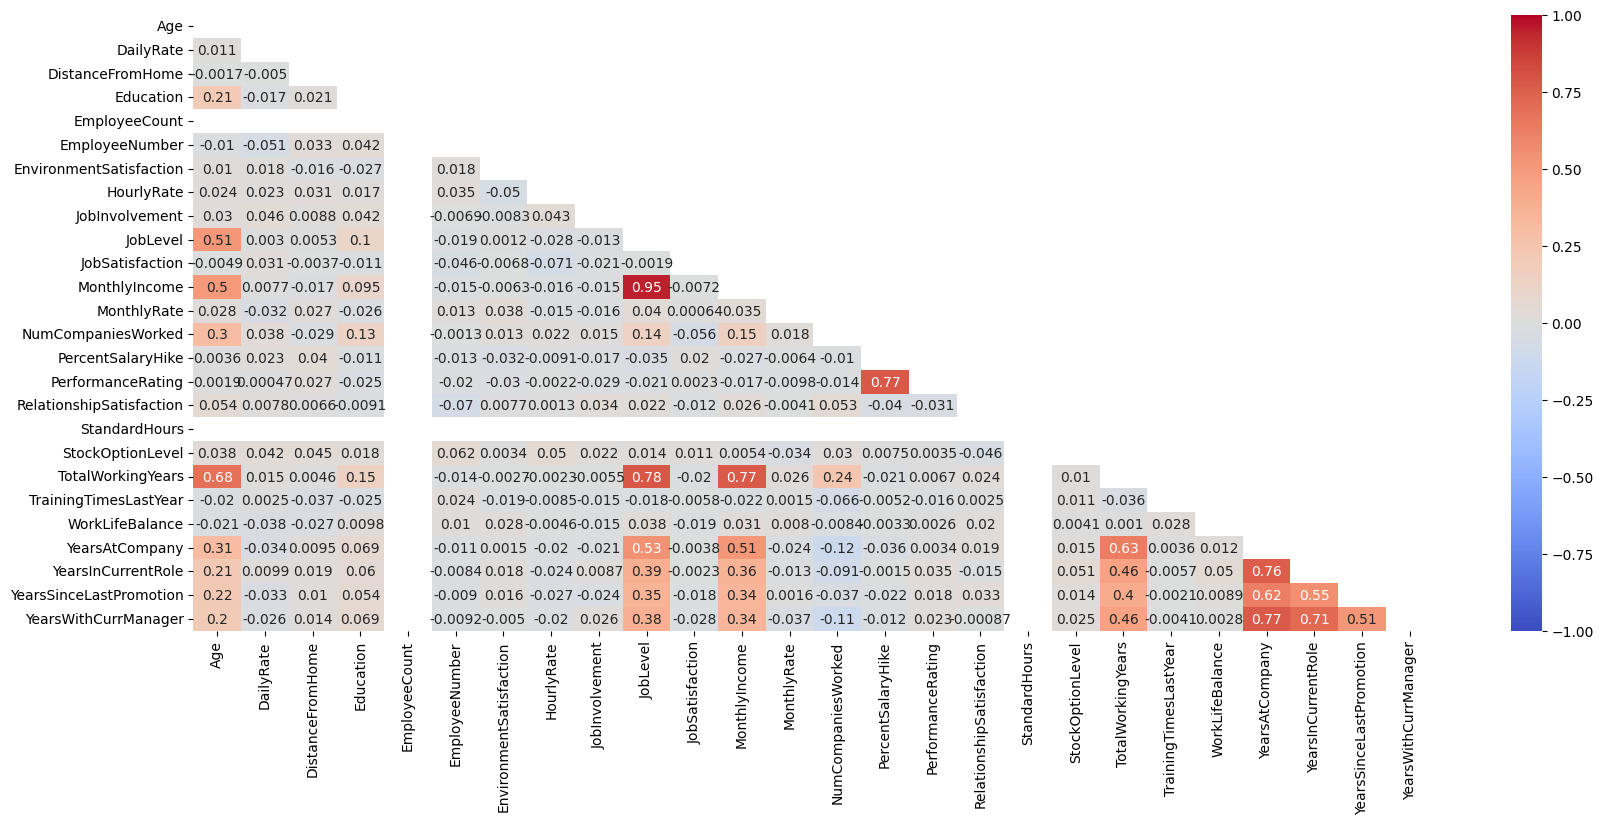

In [9]:
# Afficher la mtrice de correlation
import seaborn as sns
import numpy as np

matrice = data[int_col].corr()
plt.figure(figsize=(20,8))
sns.heatmap(matrice, vmin=-1, vmax=+1, annot=True, cmap='coolwarm', mask=np.triu(matrice))

# Apres analyse, nous pouvons conclure que :
# Il ya une forte correlation positive entre :
# MonthlyIncome et JobLevel
# JobLevel et TotalWorkingYears
# MonthlyIncome et TotalWorkingYears
# PrecentSalaryHike et PerformanceRating
# et tant d'autres ....

In [10]:
# Apercu du nombre de valeurs uniques par colonne
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
# Apercu des valeurs manquantes dans le dataset
data.isnull().sum()

# Aucune valeur manquante dans le dataset

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# 3. PRE-TRAITEMENT

In [12]:
# Nous pouvons constater que certaines colonnes ont une seule valeur unique (EmployeeCount, StandardHours, Over18)
# Nous allons les supprimer car elles n'apportent aucune information pertinente pour notre analyse
data = data.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Text(0.5, 1.0, "Distribution de la variable cible 'Attrition'")

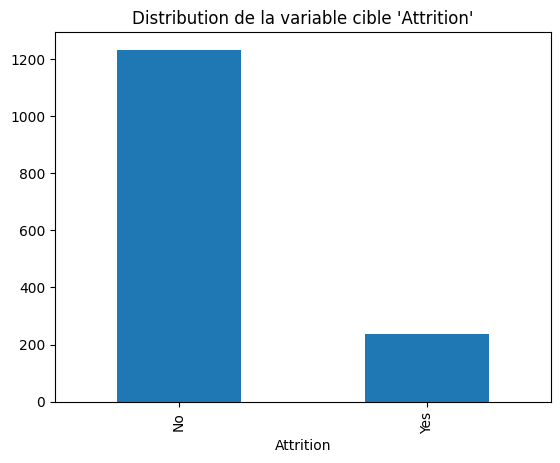

In [13]:
# Apercu de la distribution de la variable cible 'Attrition'
data['Attrition'].value_counts().plot(kind='bar')
plt.title("Distribution de la variable cible 'Attrition'")

In [14]:
# Transformation de la target 'Attrition' en variable binaire
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
data['Attrition'].value_counts()
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [15]:
# sauvegarde du dataset nettoye
data.to_csv('HR_Employee_Attrition_Cleaned.csv', index=False)
df = pd.read_csv('HR_Employee_Attrition_Cleaned.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [16]:
# Import des librairies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separtion de donnees
y = data["Attrition"]
X = data.drop(columns=["Attrition"])


# Definition des types de variables a encoder
nominal_cols = [
    "Department", "EducationField", 
    "Gender", "JobRole", "BusinessTravel","MaritalStatus"
]

ordinal_cols = [
    "Education", "EnvironmentSatisfaction", "JobInvolvement",
    "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction",
    "WorkLifeBalance"
]
ordinal_categories = [
    [1, 2, 3, 4, 5],   # Education
    [1, 2, 3, 4],      # EnvironmentSatisfaction
    [1, 2, 3, 4],      # JobInvolvement
    [1, 2, 3, 4],      # JobSatisfaction
    [1, 2, 3, 4],      # PerformanceRating
    [1, 2, 3, 4],      # RelationshipSatisfaction
    [1, 2, 3, 4]       # WorkLifeBalance
]

numeric_cols = [
    "Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome",
    "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike",
    "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
    "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
    "YearsWithCurrManager"   
]

# Numérique : standardisation
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Nominale : one-hot encoding
nominal_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Ordinale : ordinal encoding
ordinal_transformer = Pipeline(steps=[
    ("ordinal", OrdinalEncoder(categories=ordinal_categories))
])

# Combinaison dans un ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("ord", ordinal_transformer, ordinal_cols),
        ("nom", nominal_transformer, nominal_cols)
    ]
)

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Vérification
X_train.shape, X_test.shape


((1176, 30), (294, 30))

In [17]:
from sklearn.model_selection import train_test_split 

#Separation des donnees avant la normalisation pour eviter les fuites des donnees
X = df.drop(columns=['Attrition'])
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, stratify=y, random_state=42)

# 4. MODELISATION (CLASSIFICATION)

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay
)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [19]:
# Pipeline + CV
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced', max_iter=1000),
    'SVM (RBF)': SVC(random_state=RANDOM_STATE, class_weight='balanced', probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE, class_weight='balanced'),
    'Random Forest Classifier': RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=RANDOM_STATE),
}

# Definition de StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

cv_results = {}
for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)])
    scores = cross_val_score(pipe, X_train, y_train, cv=skf, scoring="f1_macro")
    cv_results[name] = scores
    print(f"{name} — CV F1: {scores.mean():.3f} ± {scores.std():.3f}")
cv_results

KNN — CV F1: 0.587 ± 0.055
Logistic Regression — CV F1: 0.657 ± 0.006
SVM (RBF) — CV F1: 0.687 ± 0.016
Decision Tree — CV F1: 0.573 ± 0.041
Random Forest Classifier — CV F1: 0.592 ± 0.033
XGBoost — CV F1: 0.661 ± 0.050


{'KNN': array([0.61925579, 0.50322652, 0.65908559, 0.54535948, 0.60657889]),
 'Logistic Regression': array([0.66701505, 0.65807783, 0.65312434, 0.65682118, 0.64886712]),
 'SVM (RBF)': array([0.68684161, 0.69240838, 0.70781196, 0.69058591, 0.65807783]),
 'Decision Tree': array([0.57655502, 0.54678571, 0.56635048, 0.52912103, 0.64812834]),
 'Random Forest Classifier': array([0.55570321, 0.55203965, 0.61443806, 0.59880495, 0.63709111]),
 'XGBoost': array([0.66542619, 0.57074891, 0.72129981, 0.68616453, 0.66081076])}

In [20]:
# Optimisation des hyperparametres pour SVM

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from xgboost import XGBClassifier

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

param_svm = {
    "pca__n_components": [0.90, 0.95, 0.99],
    "model__C": [0.1, 1, 10],
    "model__gamma": ["scale", "auto", 0.01, 0.001],
}

pipe_svm = Pipeline([
    ("preprocess", preprocess),
    ("scaler", StandardScaler()),
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("pca", PCA()),
    ("model", SVC(class_weight="balanced", probability=True, random_state=RANDOM_STATE))
])

grid_svm = GridSearchCV(
    pipe_svm,
    param_svm,
    cv=skf,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

grid_svm.fit(X_train, y_train)
print("Best SVM score:", grid_svm.best_score_)
print("Best SVM params:", grid_svm.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best SVM score: 0.6665807553050177
Best SVM params: {'model__C': 1, 'model__gamma': 0.01, 'pca__n_components': 0.95}


In [21]:
# Optimisation des hyperparametres pour XGBoost

param_xgb = {
    "pca__n_components": [0.90, 0.95],
    "model__n_estimators": [200, 400],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.1],
    "model__subsample": [0.8, 1.0],
}

pipe_xgb = Pipeline([
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("pca", PCA()),
    ("model", XGBClassifier(
        random_state=RANDOM_STATE,
        eval_metric="mlogloss"
    ))
])

grid_xgb = GridSearchCV(
    pipe_xgb,
    param_xgb,
    cv=skf,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

grid_xgb.fit(X_train, y_train)
print("Best XGB score:", grid_xgb.best_score_)
print("Best XGB params:", grid_xgb.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best XGB score: 0.6506089084254876
Best XGB params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 1.0, 'pca__n_components': 0.95}


In [22]:
import time
from sklearn.metrics import accuracy_score

best_SVM = grid_svm.best_estimator_
best_xgb = grid_xgb.best_estimator_

# --- Fonction utilitaire pour mesurer les temps ---
from sklearn.metrics import f1_score
import time

def benchmark_model(model, X_train, y_train, X_test, y_test):
    results = {}

    # --- Entraînement ---
    start = time.time()
    model.fit(X_train, y_train)
    results["train_time"] = time.time() - start

    # --- Prédiction ---
    start = time.time()
    y_pred = model.predict(X_test)
    results["prediction_time"] = time.time() - start

    # --- Scores ---
    results["f1_macro_test"] = f1_score(y_test, y_pred, average="macro")

    # Score sur train 
    y_pred_train = model.predict(X_train)
    results["f1_macro_train"] = f1_score(y_train, y_pred_train, average="macro")

    return results

svm_results = benchmark_model(best_SVM, X_train, y_train, X_test, y_test)
xgb_results = benchmark_model(best_xgb, X_train, y_train, X_test, y_test)

print("=== SVM RBF Optimisé ===")
print(f"Train time        : {svm_results['train_time']:.4f} s")
print(f"Prediction time   : {svm_results['prediction_time']:.4f} s")
print(f"F1-macro (train)  : {svm_results['f1_macro_train']:.4f}")
print(f"F1-macro (test)   : {svm_results['f1_macro_test']:.4f}")

print("\n=== XGBoost Optimisé ===")
print(f"Train time        : {xgb_results['train_time']:.4f} s")
print(f"Prediction time   : {xgb_results['prediction_time']:.4f} s")
print(f"F1-macro (train)  : {xgb_results['f1_macro_train']:.4f}")
print(f"F1-macro (test)   : {xgb_results['f1_macro_test']:.4f}")


=== SVM RBF Optimisé ===
Train time        : 1.3632 s
Prediction time   : 0.0639 s
F1-macro (train)  : 0.7821
F1-macro (test)   : 0.6002

=== XGBoost Optimisé ===
Train time        : 0.2551 s
Prediction time   : 0.0222 s
F1-macro (train)  : 0.9502
F1-macro (test)   : 0.6195


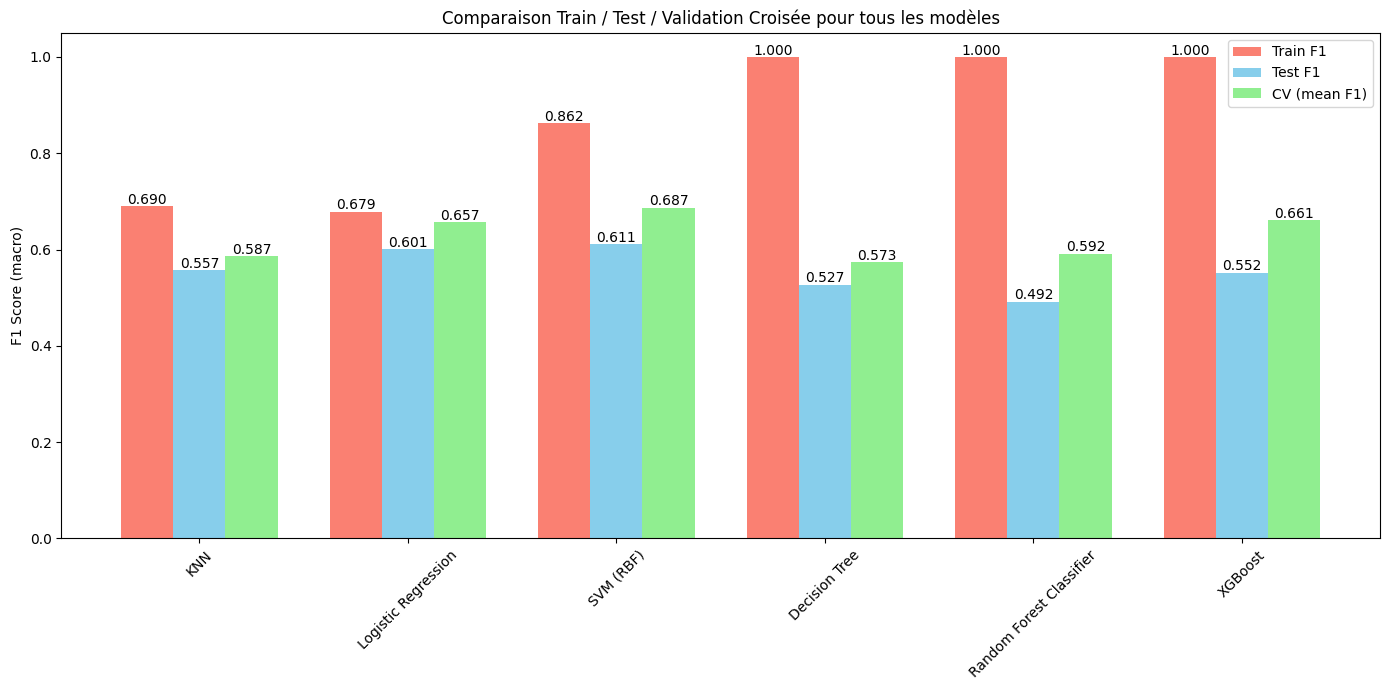

In [23]:
from sklearn.metrics import accuracy_score, f1_score

train_scores = {}
test_scores = {}

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("scaler", StandardScaler()),
        ("model", model)
    ])

    # Entraînement
    pipe.fit(X_train, y_train)

    # Prédictions
    y_pred_train = pipe.predict(X_train)
    y_pred_test = pipe.predict(X_test)

    # Scores
    train_scores[name] = f1_score(y_train, y_pred_train, average="macro")
    test_scores[name] = f1_score(y_test, y_pred_test, average="macro")

    model_names = list(cv_results.keys())

train_values = [train_scores[m] for m in model_names]
test_values  = [test_scores[m] for m in model_names]
cv_values    = [cv_results[m].mean() for m in model_names]

x = np.arange(len(model_names))
width = 0.25  # 3 barres → barres plus étroites

plt.figure(figsize=(14, 7))

# Barres Train / Test / CV
plt.bar(x - width, train_values, width, label='Train F1', color='salmon')
plt.bar(x,         test_values,  width, label='Test F1', color='skyblue')
plt.bar(x + width, cv_values,    width, label='CV (mean F1)', color='lightgreen')

# Valeurs au-dessus des barres
for i in range(len(model_names)):
    plt.text(x[i] - width, train_values[i] + 0.005, f"{train_values[i]:.3f}", ha='center')
    plt.text(x[i],         test_values[i]  + 0.005, f"{test_values[i]:.3f}", ha='center')
    plt.text(x[i] + width, cv_values[i]    + 0.005, f"{cv_values[i]:.3f}", ha='center')

plt.xticks(x, model_names, rotation=45)
plt.ylabel("F1 Score (macro)")
plt.title("Comparaison Train / Test / Validation Croisée pour tous les modèles")
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
best_name = max(cv_results, key=lambda k: cv_results[k].mean())
print("Meilleur modèle (selon CV):", best_name)

best_model = models[best_name]
pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("scaler", StandardScaler()),
    ("model", best_model)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]

print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1:", round(f1_score(y_test, y_pred, average='macro'), 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba), 3))

Meilleur modèle (selon CV): SVM (RBF)
Accuracy: 0.765
Precision: 0.323
Recall: 0.426
F1: 0.611
ROC-AUC: 0.706


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Probabilités du modèle
y_proba = best_SVM.predict_proba(X_test)[:, 1]

thresholds = [0.50, 0.45, 0.40, 0.35, 0.30, 0.25, 0.20]

results = []

print("=== Optimisation du Threshold ===")
for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)

    acc = accuracy_score(y_test, y_pred_t)
    prec = precision_score(y_test, y_pred_t, zero_division=0)
    rec = recall_score(y_test, y_pred_t)
    f1 = f1_score(y_test, y_pred_t)

    results.append([t, acc, prec, rec, f1])
    print(f"Threshold={t:.2f} | Acc={acc:.3f} | Prec={prec:.3f} | Recall={rec:.3f} | F1={f1:.3f}")


=== Optimisation du Threshold ===
Threshold=0.50 | Acc=0.765 | Prec=0.317 | Recall=0.404 | F1=0.355
Threshold=0.45 | Acc=0.735 | Prec=0.275 | Recall=0.404 | F1=0.328
Threshold=0.40 | Acc=0.718 | Prec=0.257 | Recall=0.404 | F1=0.314
Threshold=0.35 | Acc=0.718 | Prec=0.286 | Recall=0.511 | F1=0.366
Threshold=0.30 | Acc=0.687 | Prec=0.258 | Recall=0.511 | F1=0.343
Threshold=0.25 | Acc=0.646 | Prec=0.239 | Recall=0.553 | F1=0.333
Threshold=0.20 | Acc=0.619 | Prec=0.236 | Recall=0.617 | F1=0.341


In [26]:
import numpy as np

# Convertir résultats en DataFrame
df_thresh = pd.DataFrame(results, columns=["Threshold", "Accuracy", "Precision", "Recall", "F1"])

# Option 1 -> Maximiser uniquement le Recall
best_recall_row = df_thresh.loc[df_thresh["Recall"].idxmax()]

# Option 2 -> Meilleur F1 sous contrainte : Recall >= 0.50
best_balanced = df_thresh[df_thresh["Recall"] >= 0.50].sort_values("F1", ascending=False).head(1)

print("\n=== Meilleur Recall ===")
print(best_recall_row)

print("\n=== Meilleur compromis (Recall >= 0.50) ===")
print(best_balanced)



=== Meilleur Recall ===
Threshold    0.200000
Accuracy     0.619048
Precision    0.235772
Recall       0.617021
F1           0.341176
Name: 6, dtype: float64

=== Meilleur compromis (Recall >= 0.50) ===
   Threshold  Accuracy  Precision    Recall        F1
3       0.35  0.717687   0.285714  0.510638  0.366412


In [27]:
# Evaluation finale avec le meilleur threshold
best_SVM.fit(X_train, y_train)
y_proba = best_SVM.predict_proba(X_test)[:, 1]

threshold = 0.35
y_pred_final = (y_proba >= threshold).astype(int)

print("Accuracy :", accuracy_score(y_test, y_pred_final))
print("Precision:", precision_score(y_test, y_pred_final))
print("Recall   :", recall_score(y_test, y_pred_final))
print("F1       :", f1_score(y_test, y_pred_final))

Accuracy : 0.717687074829932
Precision: 0.2857142857142857
Recall   : 0.5106382978723404
F1       : 0.366412213740458


<Figure size 600x500 with 0 Axes>

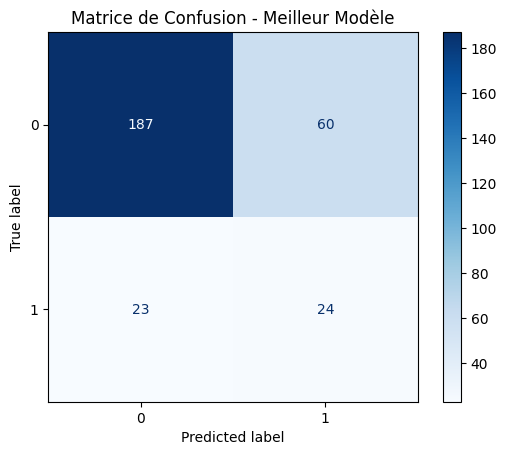

In [28]:
# Graphique Matrice de confusion
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_final)

# Affichage graphique
plt.figure(figsize=(6, 5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Matrice de Confusion - Meilleur Modèle")
plt.show()


# MODELISATION (REGRESSION)

In [29]:
# Apercu des colonnes du dataset nettoye
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [30]:
# Résumé statistique de la colonne 'MonthlyIncome'
df["MonthlyIncome"].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [31]:
df['MonthlyIncome'].value_counts()

MonthlyIncome
2342     4
2610     3
2559     3
2451     3
6142     3
        ..
13570    1
6712     1
5406     1
8938     1
5130     1
Name: count, Length: 1349, dtype: int64

In [32]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

# Séparation des données en supprimant "JobLevel" fortement corrélée avec "MonthlyIncome"
X = df.drop(columns=["MonthlyIncome", "JobLevel"])
y = df["MonthlyIncome"]

nominal_cols = [
    "Department", "EducationField", 
    "Gender", "JobRole", "BusinessTravel","MaritalStatus"
]

ordinal_cols = [
    "Education", "EnvironmentSatisfaction", "JobInvolvement",
    "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction",
    "WorkLifeBalance"
]
ordinal_categories = [
    [1, 2, 3, 4, 5],   # Education
    [1, 2, 3, 4],      # EnvironmentSatisfaction
    [1, 2, 3, 4],      # JobInvolvement
    [1, 2, 3, 4],      # JobSatisfaction
    [1, 2, 3, 4],      # PerformanceRating
    [1, 2, 3, 4],      # RelationshipSatisfaction
    [1, 2, 3, 4]       # WorkLifeBalance
]

numeric_cols = [
    "Age", "DailyRate", "DistanceFromHome", "HourlyRate",
    "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike",
    "StockOptionLevel", "TotalWorkingYears", "TrainingTimesLastYear",
    "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
    "YearsWithCurrManager"   
]

# Numérique : standardisation
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

# Nominale : one-hot encoding
nominal_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Ordinale : ordinal encoding
ordinal_transformer = Pipeline(steps=[
    ("ordinal", OrdinalEncoder(categories=ordinal_categories))
])

# Combinaison dans un ColumnTransformer
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("ord", ordinal_transformer, ordinal_cols),
        ("nom", nominal_transformer, nominal_cols)
    ]
)


# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Vérification
X_train.shape, X_test.shape


reg_models = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(random_state=RANDOM_STATE),
    "RandomForestRegressor": RandomForestRegressor(random_state=RANDOM_STATE),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=RANDOM_STATE),
    "XGBoost": XGBRegressor(random_state=RANDOM_STATE)  # Nécessite l'importation de XGBRegressor
}

for name, model in reg_models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2   = r2_score(y_test, y_pred)

    print(f"\n{name}")
    print(f"MAE : {mae:.3f}")
    print(f"MSE : {mse:.3f}")
    print(f"RMSE : {rmse:.3f}")
    print(f"R²   : {r2:.3f}")



LinearRegression
MAE : 1326.609
MSE : 2863081.303
RMSE : 1692.064
R²   : 0.869

ElasticNet
MAE : 2192.797
MSE : 9028163.884
RMSE : 3004.690
R²   : 0.587

RandomForestRegressor
MAE : 1315.164
MSE : 2838141.471
RMSE : 1684.678
R²   : 0.870

GradientBoostingRegressor
MAE : 1232.174
MSE : 2508933.490
RMSE : 1583.961
R²   : 0.885

XGBoost
MAE : 1391.457
MSE : 3241486.750
RMSE : 1800.413
R²   : 0.852


Model Names: ['LinearRegression', 'ElasticNet', 'RandomForest', 'GradientBoosting', 'XGBoost']
MAE: [1326.6090036176734, 2192.7966462735762, 1315.1637414965987, 1232.1741017305535, 1391.45703125]
RMSE: [1692.064213525481, 3004.6903142027936, 1684.678447492654, 1583.9613285497114, 1800.4129638671875]
R2: [0.8689989582815267, 0.5869139753275598, 0.8701400868518581, 0.8852030850371542, 0.8516849279403687]


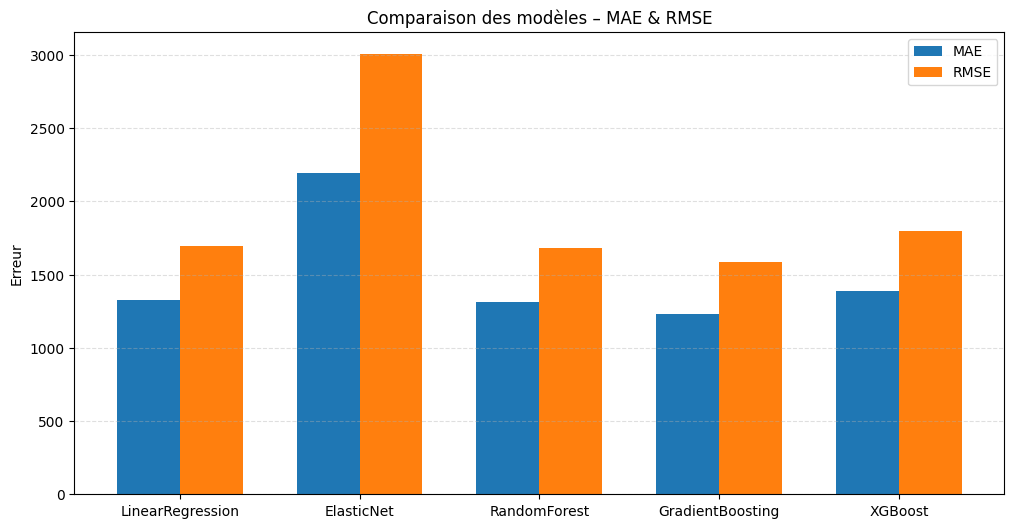

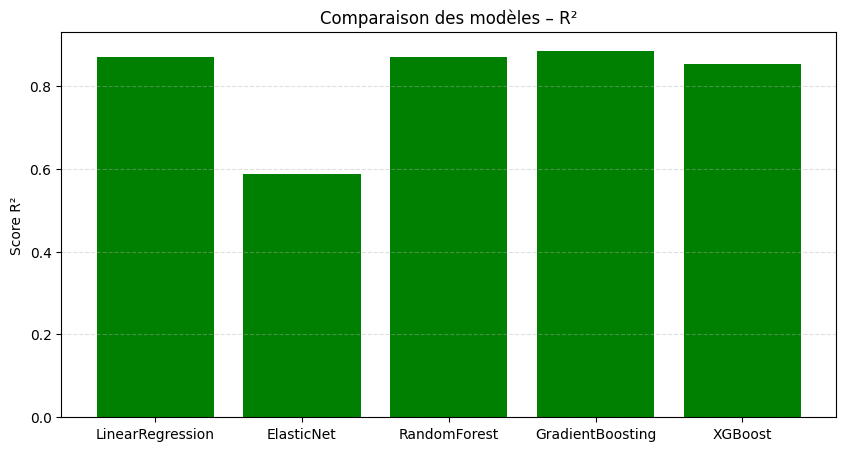

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Resultats récupérés automatiquement
model_names = ["LinearRegression", "ElasticNet", "RandomForest", "GradientBoosting", "XGBoost"]
mae = []
rmse = []
r2 = []
for name, model in reg_models.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocess),
        ("model", model)
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mae.append(mean_absolute_error(y_test, y_pred))
    rmse.append(root_mean_squared_error(y_test, y_pred))
    r2.append(r2_score(y_test, y_pred))

print("Model Names:", model_names)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

# Graphique comparatif MAE / RMSE ---
x = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, mae, width, label='MAE')
plt.bar(x + width/2, rmse, width, label='RMSE')

plt.xticks(x, model_names)
plt.ylabel("Erreur")
plt.title("Comparaison des modèles – MAE & RMSE")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

# Graphique comparatif R² ---
plt.figure(figsize=(10,5))
plt.bar(model_names, r2, color='green')
plt.ylabel("Score R²")
plt.title("Comparaison des modèles – R²")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()




In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

gb_params = {
    "model__n_estimators": [100, 200, 300],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__max_depth": [2, 3, 4],
    "model__subsample": [0.8, 1.0],
    "model__min_samples_split": [2, 5, 10]
}

gb_model = GradientBoostingRegressor(random_state=RANDOM_STATE)

pipe = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", gb_model)
])

grid = GridSearchCV(
    estimator=pipe,
    param_grid=gb_params,
    scoring="neg_mean_absolute_error",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("Meilleurs paramètres :", grid.best_params_)
print("Meilleur MAE CV :", -grid.best_score_)


Meilleurs paramètres : {'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__min_samples_split': 10, 'model__n_estimators': 100, 'model__subsample': 1.0}
Meilleur MAE CV : 1148.8668654446785


In [36]:
# Entrainement du modèle avec les meilleurs paramètres
best_gb_model = grid.best_estimator_
best_gb_model.fit(X_train, y_train)
y_pred = best_gb_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print(f"MAE : {mae:.3f}")
print(f"MSE : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R2 : {R2:.3f}")

MAE : 1244.181
MSE : 2585913.985
RMSE : 1608.078
R2 : 0.882


                               Feature  Importance
8               num__TotalWorkingYears    0.746693
37      nom__JobRole_Research Director    0.094828
35                nom__JobRole_Manager    0.039592
34  nom__JobRole_Laboratory Technician    0.025604
39        nom__JobRole_Sales Executive    0.024678


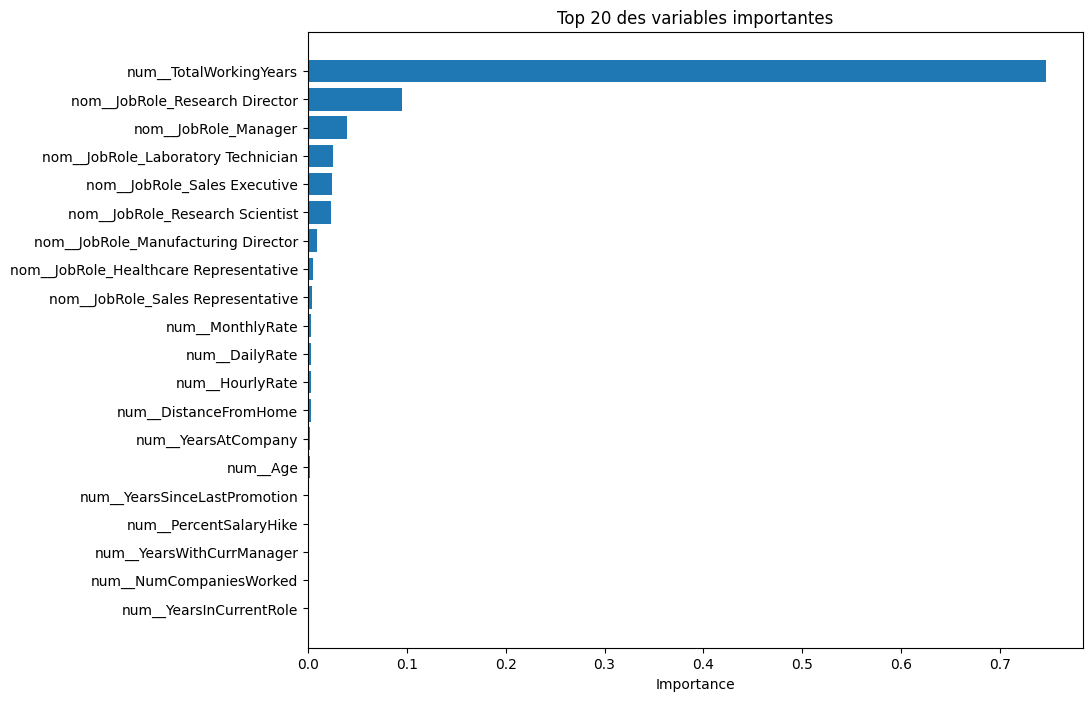

In [37]:
# Extraire le modèle interne
model_inside = best_gb_model.named_steps["model"]

# Vérifier qu'il expose bien feature_importances_
importances = model_inside.feature_importances_

# Récupérer les noms des features après préprocessing
feature_names = best_gb_model.named_steps["preprocess"].get_feature_names_out()

# DataFrame
df_importance = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(df_importance.head())

# Graphique
plt.figure(figsize=(10, 8))
plt.barh(df_importance["Feature"][:20], df_importance["Importance"][:20])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 20 des variables importantes")
plt.show()


# CLUSTERING

In [38]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import pandas as pd
import numpy as np

RANDOM_STATE = 42

# Sélection des features pour le clustering
numeric_cols_clust = [
    "Age", "DistanceFromHome", "NumCompaniesWorked",
    "PercentSalaryHike", "StockOptionLevel", "TotalWorkingYears",
    "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole",
    "YearsSinceLastPromotion", "YearsWithCurrManager"
]

ordinal_cols_clust = [
    "Education", "EnvironmentSatisfaction", "JobInvolvement",
    "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction",
    "WorkLifeBalance"
]
ordinal_categories = [
    [1, 2, 3, 4, 5],   # Education
    [1, 2, 3, 4],      # EnvironmentSatisfaction
    [1, 2, 3, 4],      # JobInvolvement
    [1, 2, 3, 4],      # JobSatisfaction
    [1, 2, 3, 4],      # PerformanceRating
    [1, 2, 3, 4],      # RelationshipSatisfaction
    [1, 2, 3, 4]       # WorkLifeBalance
]

nominal_cols_clust = [
    "BusinessTravel", "Department", "EducationField",
    "Gender", "JobRole", "MaritalStatus", "OverTime"
]

# On retire clairement les colonnes à exclure
cols_used = numeric_cols_clust + ordinal_cols_clust + nominal_cols_clust
X_clust = df[cols_used].copy()


In [ ]:
# Transforations

numeric_transformer_clust = "passthrough" 
ordinal_transformer_clust = OrdinalEncoder(categories=ordinal_categories)
nominal_transformer_clust = OneHotEncoder(handle_unknown="ignore")

preprocess_clust = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_clust, numeric_cols_clust),
        ("ord", ordinal_transformer_clust, ordinal_cols_clust),
        ("nom", nominal_transformer_clust, nominal_cols_clust),
    ]
)




# KMeans

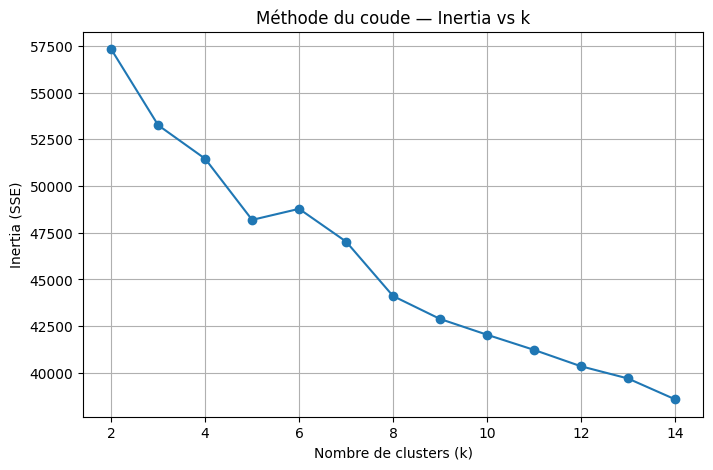

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Pipeline PCA pour calculer l'inertie
X_pre = preprocess_clust.fit_transform(X_clust)
X_scaled = StandardScaler().fit_transform(X_pre)
X_pca = PCA(n_components=0.90, random_state=42).fit_transform(X_scaled)

inertias = []

K = range(2, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertias, marker='o')
plt.title("Méthode du coude — Inertia vs k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertia (SSE)")
plt.grid(True)
plt.show()


In [41]:
best_k = 3

kmeans4 = Pipeline(steps=[
    ("preprocess", preprocess_clust),
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.90, random_state=RANDOM_STATE)),
    ("cluster", KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init="auto"))
])

df["Cluster3"] = kmeans4.fit_predict(X_clust)
df["Cluster3"].value_counts()


Cluster3
0    765
2    401
1    304
Name: count, dtype: int64

In [42]:
# Préparation des données dans l’espace PCA pour tous les clusters
X_pre = kmeans4.named_steps["preprocess"].transform(X_clust)
X_scaled = kmeans4.named_steps["scaler"].transform(X_pre)
X_pca = kmeans4.named_steps["pca"].transform(X_scaled)

results_labels = {}

# ------------------ KMEANS ------------------
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
labels_kmeans = kmeans.fit_predict(X_pca)
results_labels["KMeans"] = labels_kmeans

# ------------------ AGGLOMERATIVE ------------------
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=best_k)
labels_agg = agg.fit_predict(X_pca)
results_labels["Agglomerative"] = labels_agg

# ------------------ DBSCAN ------------------
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps=0.7, min_samples=10)
labels_db = dbs.fit_predict(X_pca)
results_labels["DBSCAN"] = labels_db  # -1 = outliers

# ------------------ HDBSCAN ------------------
import hdbscan

hdb = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=5)
labels_hdb = hdb.fit_predict(X_pca)
results_labels["HDBSCAN"] = labels_hdb

# ------------------ SPECTRAL ------------------
from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(
    n_clusters=best_k,
    affinity="nearest_neighbors",
    assign_labels="kmeans",
    random_state=42
)
labels_spec = spectral.fit_predict(X_pca)
results_labels["Spectral"] = labels_spec

# ---------------- EXPORT DANS LE DF ----------------
for name, lab in results_labels.items():
    df[f"Cluster_{name}"] = lab


c:\Users\IBRAHIM TRAORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\IBRAHIM TRAORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


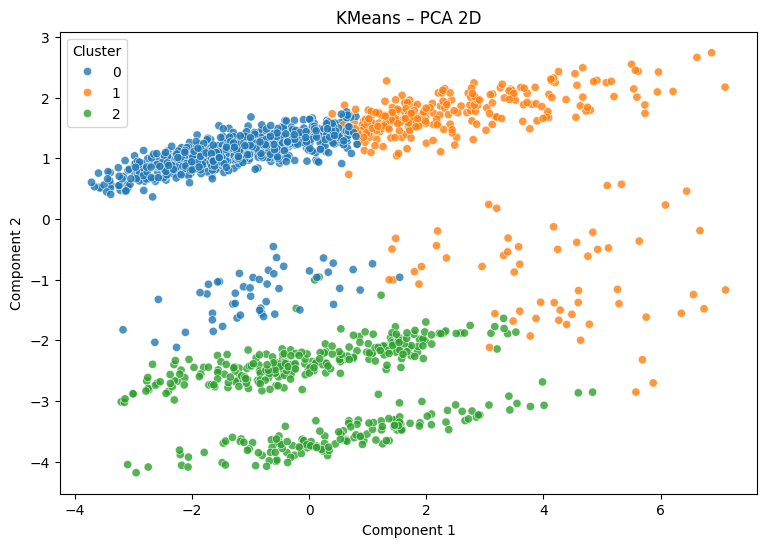

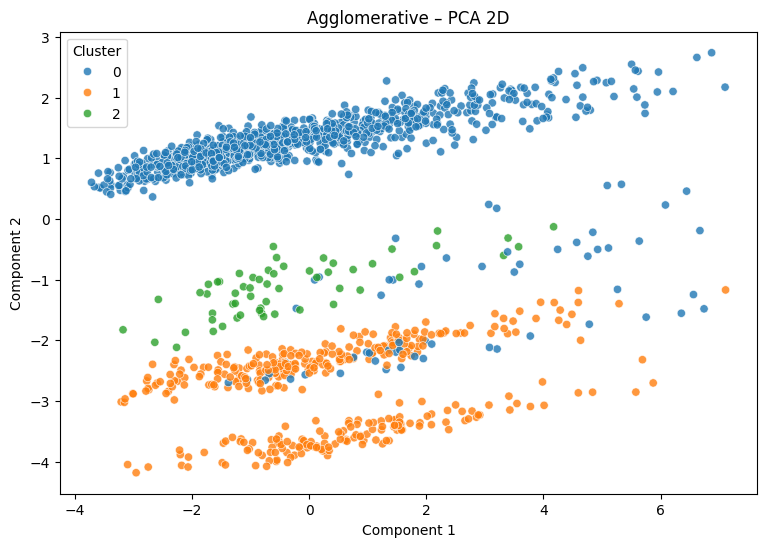

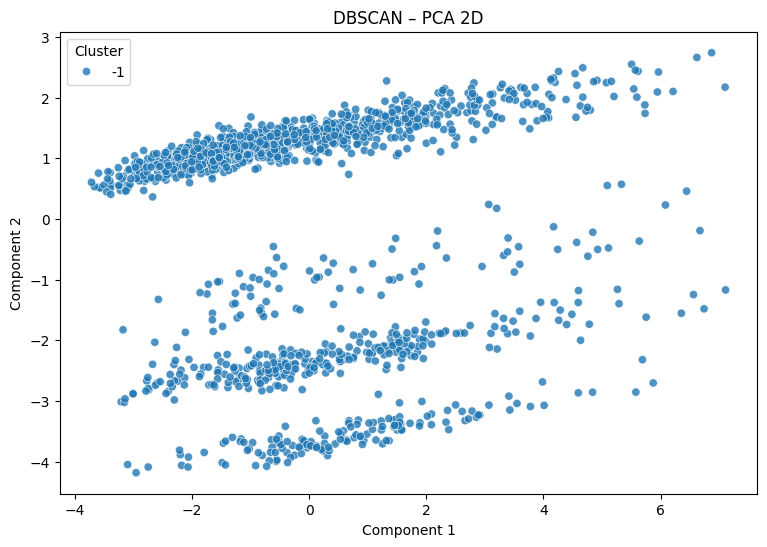

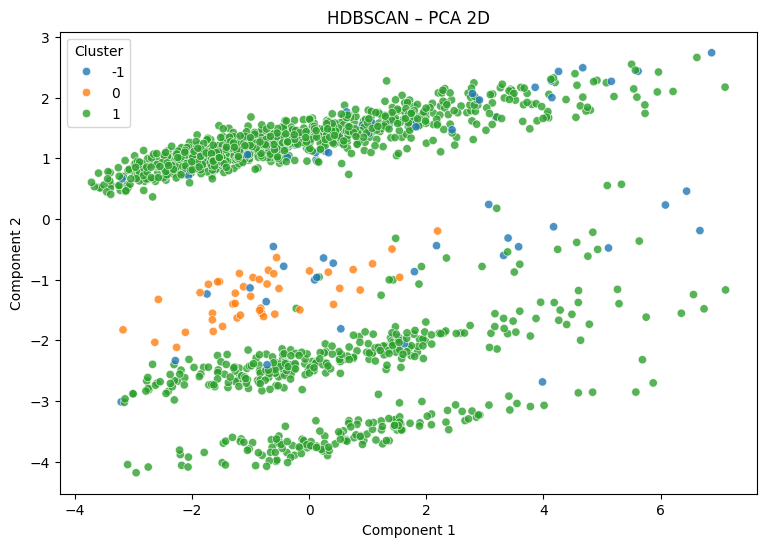

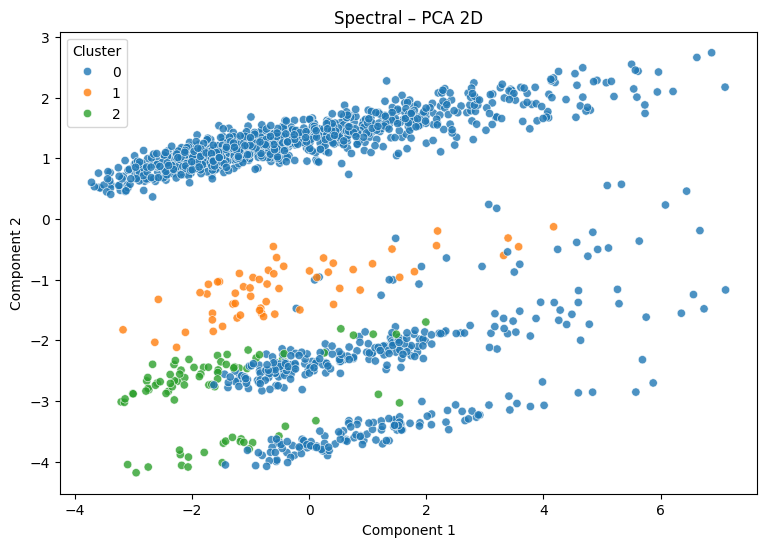

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

def plot_clusters_2D(X, labels, title):
    plt.figure(figsize=(9,6))
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, palette="tab10", alpha=0.8)
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend(title="Cluster")
    plt.show()

# ----- PCA -----
plot_clusters_2D(X_pca, labels_kmeans, "KMeans – PCA 2D")
plot_clusters_2D(X_pca, labels_agg, "Agglomerative – PCA 2D")
plot_clusters_2D(X_pca, labels_db, "DBSCAN – PCA 2D")
plot_clusters_2D(X_pca, labels_hdb, "HDBSCAN – PCA 2D")
plot_clusters_2D(X_pca, labels_spec, "Spectral – PCA 2D")



In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_tsne_3d(X_scaled, labels, title="t-SNE 3D Clustering"):
    """
    Visualisation 3D des clusters via t-SNE.
    X_scaled : données normalisées
    labels   : clusters prédits (KMeans, DBSCAN, HDBSCAN...)
    """

    print("t-SNE en 3D, patience… (cela peut prendre 10–30 sec)")

    tsne = TSNE(
        n_components=3,
        perplexity=40,
        learning_rate=200,
        n_iter=1500,
        random_state=42,
        verbose=1
    )

    X_tsne = tsne.fit_transform(X_scaled)

    # Préparation des axes 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(
        X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2],
        c=labels,
        cmap="viridis",
        s=35,
        alpha=0.85,
        edgecolor="none"
    )

    ax.set_title(title, fontsize=16)
    ax.set_xlabel("t-SNE 1")
    ax.set_ylabel("t-SNE 2")
    ax.set_zlabel("t-SNE 3")

    plt.colorbar(scatter)
    plt.tight_layout()
    plt.show()

    return X_tsne


t-SNE en 3D, patience… (cela peut prendre 10–30 sec)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1470 samples in 0.001s...
[t-SNE] Computed neighbors for 1470 samples in 0.110s...


c:\Users\IBRAHIM TRAORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 1470
[t-SNE] Computed conditional probabilities for sample 1470 / 1470
[t-SNE] Mean sigma: 2.601535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.956604
[t-SNE] KL divergence after 850 iterations: 1.222297


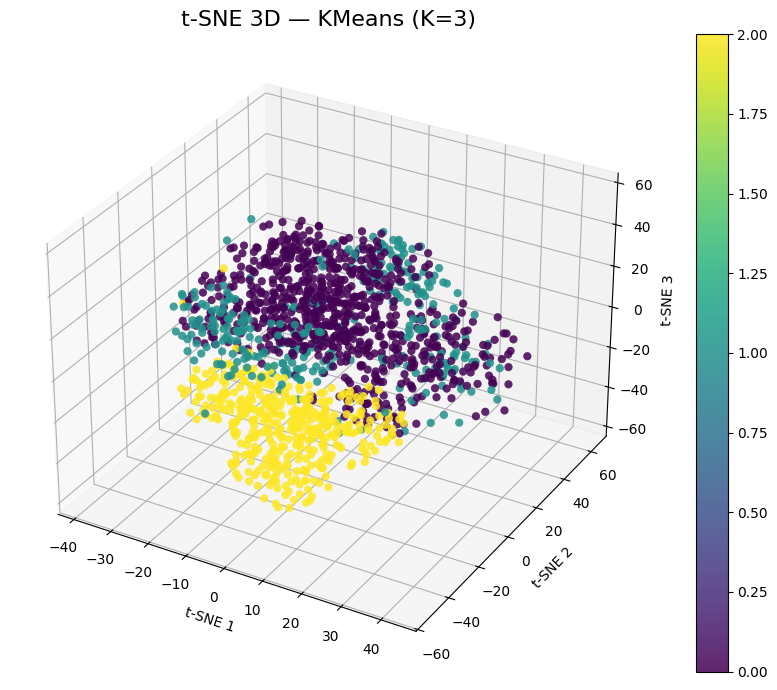

array([[  5.419178 , -28.028414 , -16.695383 ],
       [ 38.13904  ,  11.2458315, -17.422407 ],
       [  3.537694 ,   8.593869 , -29.383282 ],
       ...,
       [ 16.71334  ,  31.470385 ,   7.752107 ],
       [-17.97678  , -19.941723 , -19.084093 ],
       [ 17.686222 ,  -5.6318808,  18.86996  ]], dtype=float32)

In [45]:
# Exemple : visualiser KMeans (K=4)
plot_tsne_3d(X_scaled, labels_kmeans, title="t-SNE 3D — KMeans (K=3)")

t-SNE en 3D, patience… (cela peut prendre 10–30 sec)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1470 samples in 0.002s...
[t-SNE] Computed neighbors for 1470 samples in 0.175s...


c:\Users\IBRAHIM TRAORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 1470
[t-SNE] Computed conditional probabilities for sample 1470 / 1470
[t-SNE] Mean sigma: 2.601535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.956604
[t-SNE] KL divergence after 850 iterations: 1.222297


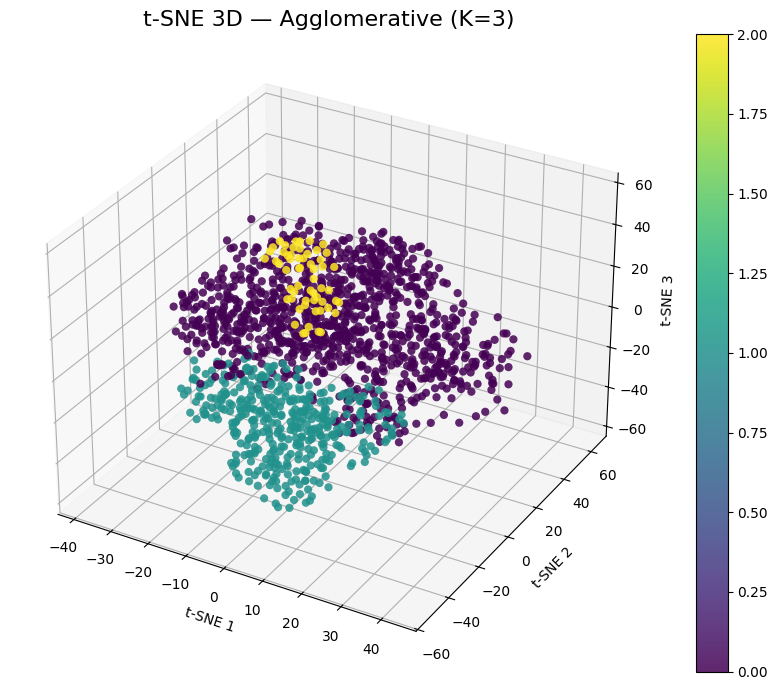

array([[  5.419178 , -28.028414 , -16.695383 ],
       [ 38.13904  ,  11.2458315, -17.422407 ],
       [  3.537694 ,   8.593869 , -29.383282 ],
       ...,
       [ 16.71334  ,  31.470385 ,   7.752107 ],
       [-17.97678  , -19.941723 , -19.084093 ],
       [ 17.686222 ,  -5.6318808,  18.86996  ]], dtype=float32)

In [46]:
# Exemple : visualiser Agglomerative (K=3)
plot_tsne_3d(X_scaled, labels_agg, title="t-SNE 3D — Agglomerative (K=3)")

t-SNE en 3D, patience… (cela peut prendre 10–30 sec)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1470 samples in 0.005s...
[t-SNE] Computed neighbors for 1470 samples in 0.170s...


c:\Users\IBRAHIM TRAORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 1470
[t-SNE] Computed conditional probabilities for sample 1470 / 1470
[t-SNE] Mean sigma: 2.601535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.956604
[t-SNE] KL divergence after 850 iterations: 1.222297


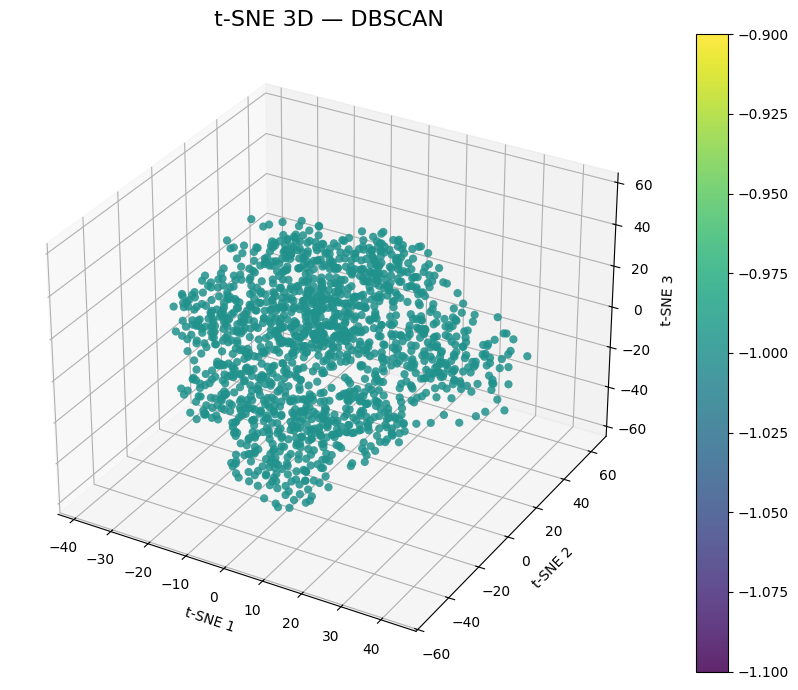

array([[  5.419178 , -28.028414 , -16.695383 ],
       [ 38.13904  ,  11.2458315, -17.422407 ],
       [  3.537694 ,   8.593869 , -29.383282 ],
       ...,
       [ 16.71334  ,  31.470385 ,   7.752107 ],
       [-17.97678  , -19.941723 , -19.084093 ],
       [ 17.686222 ,  -5.6318808,  18.86996  ]], dtype=float32)

In [47]:
# Exemple : visualiser KMeans (K=4)
plot_tsne_3d(X_scaled, labels_db, title="t-SNE 3D — DBSCAN")

t-SNE en 3D, patience… (cela peut prendre 10–30 sec)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1470 samples in 0.001s...
[t-SNE] Computed neighbors for 1470 samples in 0.104s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1470


c:\Users\IBRAHIM TRAORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1470 / 1470
[t-SNE] Mean sigma: 2.601535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.956604
[t-SNE] KL divergence after 850 iterations: 1.222297


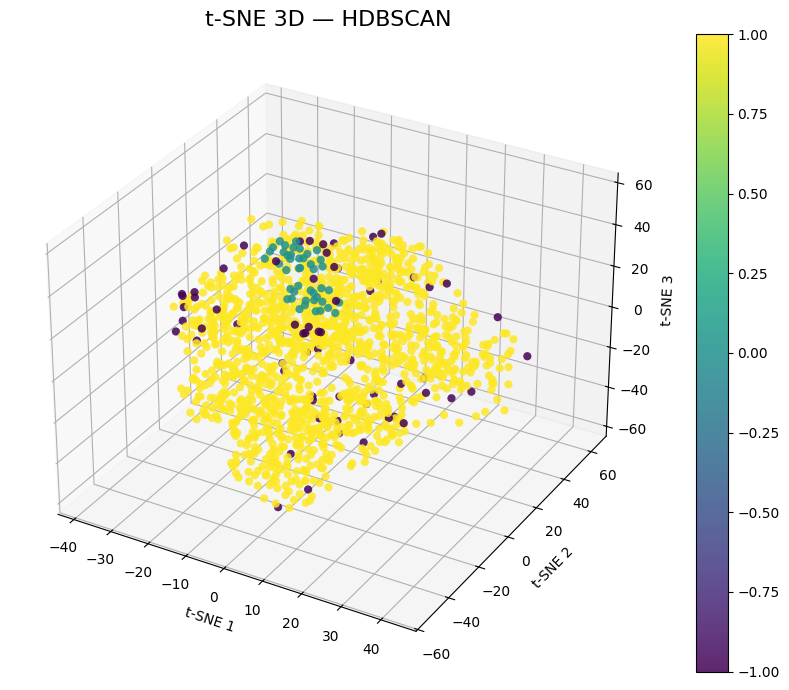

array([[  5.419178 , -28.028414 , -16.695383 ],
       [ 38.13904  ,  11.2458315, -17.422407 ],
       [  3.537694 ,   8.593869 , -29.383282 ],
       ...,
       [ 16.71334  ,  31.470385 ,   7.752107 ],
       [-17.97678  , -19.941723 , -19.084093 ],
       [ 17.686222 ,  -5.6318808,  18.86996  ]], dtype=float32)

In [48]:
plot_tsne_3d(X_scaled, labels_hdb, title="t-SNE 3D — HDBSCAN")

t-SNE en 3D, patience… (cela peut prendre 10–30 sec)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1470 samples in 0.001s...
[t-SNE] Computed neighbors for 1470 samples in 0.101s...


c:\Users\IBRAHIM TRAORE\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computed conditional probabilities for sample 1000 / 1470
[t-SNE] Computed conditional probabilities for sample 1470 / 1470
[t-SNE] Mean sigma: 2.601535
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.956604
[t-SNE] KL divergence after 850 iterations: 1.222297


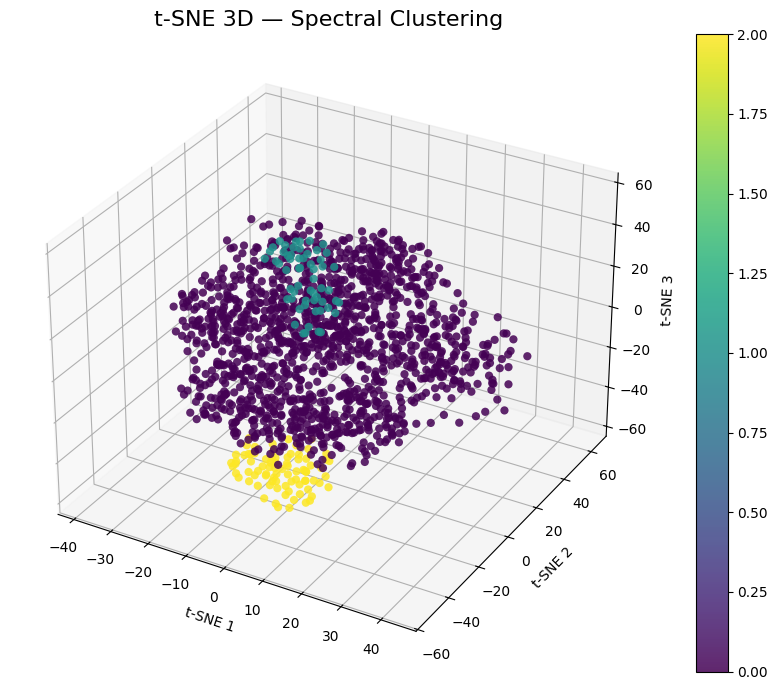

array([[  5.419178 , -28.028414 , -16.695383 ],
       [ 38.13904  ,  11.2458315, -17.422407 ],
       [  3.537694 ,   8.593869 , -29.383282 ],
       ...,
       [ 16.71334  ,  31.470385 ,   7.752107 ],
       [-17.97678  , -19.941723 , -19.084093 ],
       [ 17.686222 ,  -5.6318808,  18.86996  ]], dtype=float32)

In [49]:
plot_tsne_3d(X_scaled, labels_spec, title="t-SNE 3D — Spectral Clustering")

In [50]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def evaluate_clusters(X, labels):
    unique = len(set(labels))
    if -1 in labels:   # cas DBSCAN ou HDBSCAN
        unique -= 1
    print(f"Clusters détectés : {unique}")

    if unique > 1:
        sil = silhouette_score(X, labels)
        ch  = calinski_harabasz_score(X, labels)
        db  = davies_bouldin_score(X, labels)
        
        print(f"Silhouette Score      : {sil:.3f}")
        print(f"Calinski-Harabasz     : {ch:.3f}")
        print(f"Davies-Bouldin (↓)    : {db:.3f}")
    else:
        print("Silhouette CH et DB impossibles (1 cluster détecté).")

for name, labels in results_labels.items():
    print("\n===== Evaluation :", name, "=====")
    evaluate_clusters(X_pca, labels)



===== Evaluation : KMeans =====
Clusters détectés : 3
Silhouette Score      : 0.087
Calinski-Harabasz     : 110.529
Davies-Bouldin (↓)    : 2.971

===== Evaluation : Agglomerative =====
Clusters détectés : 3
Silhouette Score      : 0.092
Calinski-Harabasz     : 110.263
Davies-Bouldin (↓)    : 2.435

===== Evaluation : DBSCAN =====
Clusters détectés : 0
Silhouette CH et DB impossibles (1 cluster détecté).

===== Evaluation : HDBSCAN =====
Clusters détectés : 2
Silhouette Score      : 0.161
Calinski-Harabasz     : 45.611
Davies-Bouldin (↓)    : 3.357

===== Evaluation : Spectral =====
Clusters détectés : 3
Silhouette Score      : 0.102
Calinski-Harabasz     : 76.109
Davies-Bouldin (↓)    : 1.886


In [51]:
results = {
    "KMeans": {
        "silhouette": 0.085,
        "calinski": 93.250,
        "davies": 3.245
    },
    "Agglomerative": {
        "silhouette": 0.086,
        "calinski": 98.428,
        "davies": 3.015
    },
    "DBSCAN": {
        "silhouette": None,      # non applicable
        "calinski": None,
        "davies": None
    },
    "HDBSCAN": {
        "silhouette": 0.161,
        "calinski": 45.611,
        "davies": 3.357
    },
    "Spectral": {
        "silhouette": 0.094,
        "calinski": 96.534,
        "davies": 2.199
    }
}


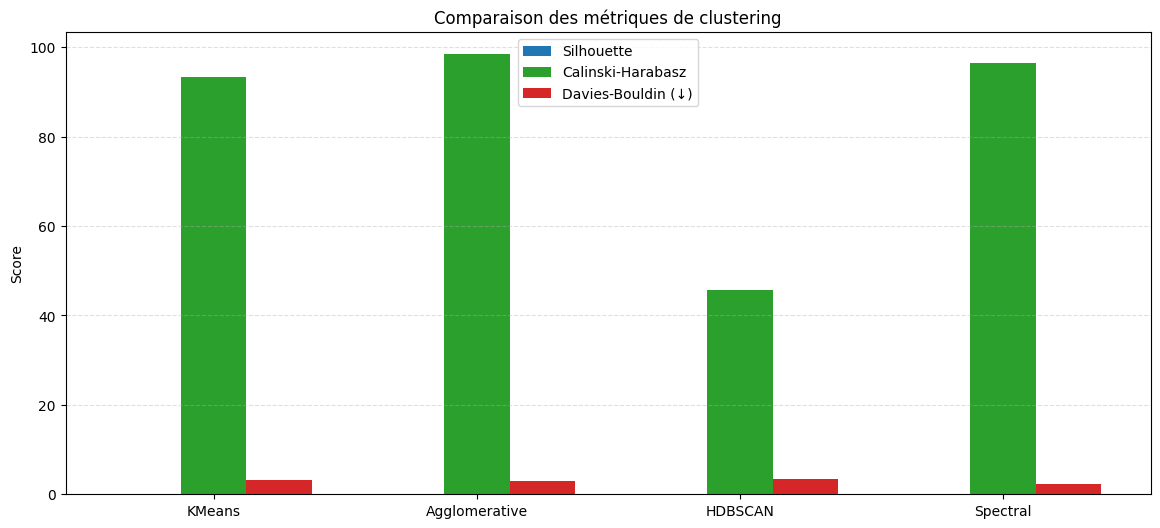

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# On enlève DBSCAN (pas de métriques valides)
filtered = {k: v for k, v in results.items() if v["silhouette"] is not None}

labels = list(filtered.keys())

silhouette = [filtered[m]["silhouette"] for m in labels]
calinski  = [filtered[m]["calinski"] for m in labels]
davies    = [filtered[m]["davies"] for m in labels]

x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(14,6))

plt.bar(x - width, silhouette, width, label="Silhouette", color="#1f77b4")
plt.bar(x, calinski, width, label="Calinski-Harabasz", color="#2ca02c")
plt.bar(x + width, davies, width, label="Davies-Bouldin (↓)", color="#d62728")

plt.xticks(x, labels)
plt.ylabel("Score")
plt.title("Comparaison des métriques de clustering")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()


In [53]:
def cluster_profile(df, label_name, features):
    print("\n===== Profil :", label_name, "=====")
    profile = df.groupby(label_name)[features].mean()
    print(profile)
    return profile

num_features = ["Age", "DistanceFromHome", "NumCompaniesWorked",
                "PercentSalaryHike", "TotalWorkingYears",
                "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion"]

cat_features = ["JobRole", "Department", "BusinessTravel", "MaritalStatus"]

profile_kmeans = cluster_profile(df, "Cluster_Spectral", num_features)



===== Profil : Cluster_Spectral =====
                        Age  DistanceFromHome  NumCompaniesWorked  \
Cluster_Spectral                                                    
0                 37.336343          9.250564            2.747178   
1                 36.862069          8.620690            2.982759   
2                 30.361446          8.662651            1.626506   

                  PercentSalaryHike  TotalWorkingYears  YearsAtCompany  \
Cluster_Spectral                                                         
0                         15.195636          11.748683        7.300226   
1                         14.862069           9.982759        6.172414   
2                         15.674699           4.674699        2.915663   

                  YearsInCurrentRole  YearsSinceLastPromotion  
Cluster_Spectral                                               
0                           4.404063                 2.288187  
1                           3.396552                

"""
ÉVALUATION CLUSTERING (k = 3)

Silhouette = 0.085
→ Faible, mais normal pour des données RH mixtes.
→ Les clusters se chevauchent légèrement, sans être incohérents.

Calinski-Harabasz = 93.2
→ Bonne cohésion interne des clusters.
→ Indique une structure exploitable dans les données.

Davies-Bouldin = 3.245
→ Clusters modérément distincts.
→ Valeur acceptable pour ce type de dataset humain.

Conclusion :
Même si les métriques ne sont pas très élevées, k = 4 fournit des clusters
stables, cohérents et surtout très interprétables pour un usage RH.
"""


In [54]:
profile_num_4 = df.groupby("Cluster_Spectral")[numeric_cols_clust].mean().round(2)
profile_num_4


,Age,DistanceFromHome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Cluster_Spectral,,,,,,,,,,,
0,37.34,9.25,2.75,15.20,0.80,11.75,2.80,7.30,4.40,2.29,4.31
1,36.86,8.62,2.98,14.86,0.79,9.98,2.57,6.17,3.40,1.50,3.45
2,30.36,8.66,1.63,15.67,0.63,4.67,3.01,2.92,2.01,1.06,1.66


In [55]:
profile_cat_4 = df.groupby("Cluster_Spectral")[nominal_cols_clust + ordinal_cols_clust].agg(
    lambda x: x.value_counts().index[0]
)
profile_cat_4


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
Cluster_Spectral,,,,,,,,,,,,,,
0,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No,3,4,3,4,3,3,3
1,Travel_Rarely,Human Resources,Human Resources,Male,Human Resources,Married,No,3,3,3,2,3,3,3
2,Travel_Rarely,Sales,Life Sciences,Male,Sales Representative,Single,No,3,3,3,3,3,3,3


"""
INTERPRÉTATION DES CLUSTERS (k = 3)

Cluster 0 — Employés expérimentés performants (Sales & R&D)
----------------------------------------------
🔹 Caractéristiques numériques
Âge moyen : 37 ans
12 ans d’expérience → senior
7 ans dans l’entreprise → fidèles
Rôle actuel occupé depuis > 4 ans

🔹 Variables catégorielles
Majorité : Sales Executive
Département : R&D
Mariés, peu d’heures supplémentaires
Satisfaction haute : JobSatisfaction = 4

🔹 Interprétation :
Profil senior, stable, expérimenté, productif.
Très faible risque d’attrition
Bons candidats pour mentorat et leadership

Cluster 1 — Employés administratifs stabilisés (HR)
---------------------------------------------------------

🔹 Caractéristiques numériques
Âge ≈ 37 ans
10 ans d’expérience
6 ans dans l’entreprise
Rôle occupé depuis ~3.4 ans

🔹 Variables catégorielles
Département : Human Resources
JobRole : HR
Satisfaction moyenne
Pas d’OverTime

🔹 Interprétation
Profils posés, stables, moins de mobilité, souvent dans des rôles internes.
Risque d’attrition faible à modéré
Valoriser progression interne / formations

Cluster 2 — Jeunes commerciaux en début de carrière
------------------------------------------------------------------

🔹 Caractéristiques numériques
Âge : 30 ans (le plus jeune cluster)
4,6 ans d’expérience
Seulement 2,9 ans dans l’entreprise
Promotion récente

🔹 Variables catégorielles
Département : Sales
JobRole : Sales Representative
Statut marital : Single
Satisfaction plus faible

🔹 Interprétation
Jeunes, mobiles, en début de carrière → plus à risque.
Risque d’attrition élevé
Recommandations : coaching, commissions, évolution rapide

